<div align="right" style="text-align:right"><i>Ólafur Bjarki Bogason<br>MIT License<br>2021</i></div>

# Rásir leystar með táknum

Í þessu skjali munum við læra að leysa einfaldar rafrásir með táknum (e. symbol). Til þess notum við Python forritunarmálið, sem er ókeypis og aðgengilegt víða, sem og [sympy pakkann](https://www.sympy.org/en/index.html) sem gerir okkur kleift að reikna jöfnur með táknum (e. symbolic calculation) í stað talna (e. numeric calculation). 

Ef þú kannt lítið á Python mæli ég með að þú [kynnir þér forritunarmálið fyrst](https://www.python.org/). Þetta skjal er [Jupyter vinnubók](https://jupyter.org/) og er hentugt viðmót til að sameina kóða, myndir og texta. Hér getur þú getur keyrt kóða, breytt og bætt, án þess að setja upp sérstakt forritunarumhverfi á tölvunni þinni, sem tekur oft $\pi$-falt lengri tíma en maður heldur 🤦.

---

Við ætlum að leysa rásir með *endurbættri hnútpunktagreiningu* (e. [Modified Nodal Analysis](https://ieeexplore.ieee.org/document/1084079), [upprunaleg vísindagrein aðgengileg hér](https://www.researchgate.net/profile/Albert_Ruehli/publication/3184759_The_Modified_Nodal_Approach_to_Network_Analysis/links/5bd34b78299bf1124fa62972/The-Modified-Nodal-Approach-to-Network-Analysis.pdf)). 

MNA er hornsteinn SPICE rásahermisins. Ótrúlegt en satt þá byrjaði SPICE verkefnið sem nemendaverkefni í rafmagnsverkfræði við Berkeley háskóla. Fyrsta útgáfa kom út 1971. Ef þið viljið læra á SPICE, mæli með að læra á [LTspice](https://en.wikipedia.org/wiki/LTspice).

Hér eru áhugaverð myndbönd um þróun SPICE hermisins
* [The Life of SPICE](https://www.youtube.com/watch?v=IkOb19FwgqY)
* [40th anniversary of SPICE (Simulation Program with Integrated Circuit Emphasis)](https://www.youtube.com/watch?v=Ta0KiizCRzI)

---

Fyrst sækjum við það sem við þurfum úr `sympy` pakkanum.

In [18]:
from sympy import symbols, Matrix, nsimplify, solve, Eq, init_printing, simplify
init_printing(use_latex=True)

def rational(expr):
    """Simplify to a rational expression"""
    return nsimplify(expr, rational=True)

Núna getum við skilgreint tákn, reiknað út og leyst jöfnur með þeim.

In [19]:
x, y = symbols('x y')

y = x ** 2 - 1

solve(y, x)

[-1, 1]

Hér að ofan fáum við út að lausnir á jöfnunni $x^2 - 1 = 0$, eru $x \in \{-1, 1\}$.

Sömuleiðis getum við leyst línuleg kerfi á forminu $A \vec{x} = \vec{b}$, eins og kerfin sem koma fyrir í greiningu rása.

In [20]:
# Hér skilgreinum við allar spennur, strauma og viðnám eða leiðni (e. conductance)
V1, V2, G1, G2, G3, G4 = symbols('V1 V2 G1 G2 G3 G4')

# Fyllum inn í fylki A
A = Matrix([
    [G1, -G1, 0, 0, 1, 0],
    [-G1, G1 + G2 + G3, -G3, -G4, 0, 0],
    [0, -G3, G3, 0, 0, 1],
    [0, -G4, 0, G4, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
])

b = Matrix([[0, 0, 0, 0, V1, V2]]).T

x = A.LUsolve(b) # Finnum lausn fyrir kerfið

simplify(x) # Notum algebru til að einfalda

⎡                V₁                 ⎤
⎢                                   ⎥
⎢           G₁⋅V₁ + G₃⋅V₂           ⎥
⎢         ─────────────────         ⎥
⎢         G₁ + G₂ + G₃ - G₄         ⎥
⎢                                   ⎥
⎢                V₂                 ⎥
⎢                                   ⎥
⎢           G₁⋅V₁ + G₃⋅V₂           ⎥
⎢         ─────────────────         ⎥
⎢         G₁ + G₂ + G₃ - G₄         ⎥
⎢                                   ⎥
⎢G₁⋅(-G₂⋅V₁ - G₃⋅V₁ + G₃⋅V₂ + G₄⋅V₁)⎥
⎢───────────────────────────────────⎥
⎢         G₁ + G₂ + G₃ - G₄         ⎥
⎢                                   ⎥
⎢G₃⋅(G₁⋅V₁ - G₁⋅V₂ - G₂⋅V₂ + G₄⋅V₂) ⎥
⎢────────────────────────────────── ⎥
⎣        G₁ + G₂ + G₃ - G₄          ⎦

Í framhaldinu getum við sett inn hvaða tölur sem við viljum inn í staðinn fyrir $V_1, V_2, G_1, G_2, G_3, G_4, G_5$ með `subs`-titude skipuninni í `sympy`.

In [21]:
x.subs({'G1': 1, 'G2': 42, 'G3': 3, 'G4': 5, 'V1': 7, 'V2': 42})

⎡  7   ⎤
⎢      ⎥
⎢ 133  ⎥
⎢ ───  ⎥
⎢  41  ⎥
⎢      ⎥
⎢  42  ⎥
⎢      ⎥
⎢ 133  ⎥
⎢ ───  ⎥
⎢  41  ⎥
⎢      ⎥
⎢-154  ⎥
⎢───── ⎥
⎢  41  ⎥
⎢      ⎥
⎢-4767 ⎥
⎢──────⎥
⎣  41  ⎦

# Dæmi

Við viljum finna $i_2$ ef $V = 12 V, I_1 = 2mA, R_1 = 12k\Omega, R_2 = 6k\Omega, R_3 = 12k\Omega, R_4 = 3k\Omega, R_5 = 13k\Omega$. Notum MNA og `sympy` til að leysa rásina.

![Dæmi um einfalda rás](img/daemi.png)
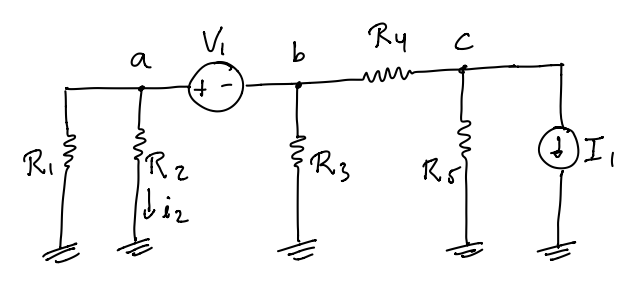

In [17]:
# Hér skilgreinum við allar spennur, strauma og viðnám eða leiðni (e. conductance)
V1, I1, G1, G2, G3, G4, G5 = symbols('V1 I1 G1 G2 G3 G4 G5')

# Fyllum inn í MNA fylki með þremur KCL og einni KVL jöfnum
A = Matrix([
    [G1+G2, 0, 0, 1],
    [0, G3+G4, -G4, -1],
    [0, -G4, G4+G5, 0],
    [1, -1, 0, 0],
])

b = Matrix([[0, 0, -I1, V1]]).T

x = A.LUsolve(b)

# Setjum inn töluleg gildi
gildi = {V1: 12, I1: 2e-3, G1: 1 / 12e3, G2: 1 / 6e3, G3: 1 / 12e3, G4: 1 / 3e3, G5: 1 / 3e3}
va, vb, vc, jv = x.subs(gildi)

# Reiknum út strauminn
i2 = (va - 0) * gildi[G2]

print(f'i_2: {i2 * 1e3} mA')


i_2: 0.571428571428572 mA
